<h1> Project on  Regression : Prediction of Store Sales</h1>
<p> Instructor : Mr. Shriraman Rajagopalan <br>By: Kalyan Chatterjee<p>

<h3/><font color="green">Aim of The Project:<font></h3>
<p>We have been provided with a dataset containing past records of different stores. We need to analyze the dataset to find different patterns and come up with a model to predict the Sales of a store. This will help the store  to strategize their business models and come up with innovative techniques and ideas to attract customers and set realistic goals.<p>

In [1]:
# Importing Required Packages

import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
from scipy.stats import norm
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from ipywidgets import interact
import ipywidgets as widgets

# Importing Dataset

In [3]:
store_df = pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")

In [4]:
store_df.sample(10) #Displaying any 10 samples

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5319,FDW12,8.315,Regular,0.035543,Baking Goods,143.3444,OUT013,1987,High,Tier 3,Supermarket Type1,1596.5884
4255,NCY41,16.750,Low Fat,0.075736,Health and Hygiene,34.5532,OUT046,1997,Small,Tier 1,Supermarket Type1,323.5788
9643,FDD56,15.200,Regular,0.103276,Fruits and Vegetables,176.2054,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
10476,FDP39,12.650,Low Fat,0.069425,Meat,52.4324,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5953,NCG18,15.300,Low Fat,0.064709,Household,103.5332,OUT035,2004,Small,Tier 2,Supermarket Type1,3383.5956
7024,FDS01,11.600,Low Fat,0.017817,Canned,177.0686,OUT018,2009,Medium,Tier 3,Supermarket Type2,1422.1488
10726,FDW34,9.600,Low Fat,0.059552,Snack Foods,243.4170,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
3817,FDG32,19.850,Low Fat,0.176991,Fruits and Vegetables,221.5772,OUT017,2007,Small,Tier 2,Supermarket Type1,3558.0352
4018,FDF44,7.170,Regular,0.059849,Fruits and Vegetables,129.4968,OUT045,2002,Small,Tier 2,Supermarket Type1,3392.9168
13414,FDZ37,8.100,Regular,0.019799,Canned,86.5198,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN


# Data Description

In [5]:
store_df.keys() # These are the necessary columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
store_df.shape # Shape of dataset before data cleaning

(14204, 12)

<p> Data Dictionary <p>

1. Item_Identifier : (String) - Unique Product ID
2. Item_Weight : (Float) - Weight of the Product
3. Item_Fat_Content : (String) - Category of the product on the basis of fat content. 
                                  i. Low fat : Product with very less amount of Fat
                                 ii. Regular Fat : Products that contains a significant amount of fat in it.
                                 
4. Item_Visibility : (Float) - How visible the product is in the Store.
5. Item_Type: (String) - Category of the product
6. Item_MRP : (float)- MRP of the Product
7. Outlet_Identifier : (String) - Unique Store ID
8. Outlet_Establishment_Year : (int) - The year in which the store had inaugurated.
9. Outlet_Size: (String) - Caterogy of store based on size.  
10. Outlet_Location_Type : (String) - Category of location of the Store
11. Outlet_Type: (String) : (String) - Type of Store based on its product type
12. Item_Outlet_Sales: (Float) - Total amount of Revenue A Store has generated for each product

In [7]:
store_df.info() # Infor of the dataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
#Isolating Categorical and Continuous Data

cat=[]
cont=[]
for col in store_df.keys():
    if store_df[col].nunique() >100:
        cont.append(col)
    else:
        cat.append(col)
        
cont.remove("Item_Identifier")
cat.append("Item_Identifier")

print(tabulate({"Categorical":cat,"Continuous":cont},headers="keys"))

Categorical                Continuous
-------------------------  -----------------
Item_Fat_Content           Item_Weight
Item_Type                  Item_Visibility
Outlet_Identifier          Item_MRP
Outlet_Establishment_Year  Item_Outlet_Sales
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Identifier


The given dataset consists of 12 features and 14204 instances.\
Out of 12 features 8 features are Categorical Features and 4 are Numerical.

# Data Cleaning

In [9]:
store_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

<p>We can see that  5681 unlabeled instances are there.<p>

In [10]:
df_not_null= store_df.dropna()
df_null =store_df[store_df.Item_Outlet_Sales.isnull()]
print("Shape of Not Null Data : ", df_not_null.shape)
print("Shape of Null Data : ", df_null.shape)
outlet_type_list= list(df_not_null.Outlet_Type .value_counts().index)
df1= df_not_null[df_not_null.Outlet_Type=="Supermarket Type1"]
pivot1 = pd.pivot_table(df1, values= "Item_Outlet_Sales", index = "Item_Identifier",aggfunc= "mean" )

df2= df_not_null[df_not_null.Outlet_Type=="Grocery Store"]
pivot2 = pd.pivot_table(df2, values= "Item_Outlet_Sales", index = "Item_Identifier",aggfunc= "mean" )

df3= df_not_null[df_not_null.Outlet_Type=="Supermarket Type3"]
pivot3 = pd.pivot_table(df3, values= "Item_Outlet_Sales", index = "Item_Identifier",aggfunc= "mean" )

df4= df_not_null[df_not_null.Outlet_Type=="Supermarket Type2"]
pivot4 = pd.pivot_table(df4, values= "Item_Outlet_Sales", index = "Item_Identifier",aggfunc= "mean" )

for i in range (len(df_null)):
    try:
        k = df_null.index[i]
        l = df_null.loc[k,"Item_Identifier"]
        if  df_null.loc[k,"Outlet_Type"] == "Supermarket Type1":
            df_null.loc[k,"Item_Outlet_Sales"] = pivot1.loc[l].values[0]
        
        elif  df_null.loc[k,"Outlet_Type"] == "Grocery Store":
            df_null.loc[k,"Item_Outlet_Sales"] = pivot2.loc[l].values[0]
        
        elif  df_null.loc[k,"Outlet_Type"] == "Supermarket Type3":
            df_null.loc[k,"Item_Outlet_Sales"] = pivot2.loc[l].values[0]
        
        elif  df_null.loc[k,"Outlet_Type"] == "Supermarket Type2":
            df_null.loc[k,"Item_Outlet_Sales"] = pivot2.loc[l].values[0]
        
    except:
        continue


Shape of Not Null Data :  (8523, 12)
Shape of Null Data :  (5681, 12)


In [11]:
df_null.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            1044
dtype: int64

After imputations we are left with 1044 Numbers of NaN values. \
Due to the absence of significant relevance we are deleting these datas.

In [12]:
df_null.dropna(inplace=True)

In [13]:
df = df_not_null.append(df_null,ignore_index = True)

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df["Age"]= 2022 - df.Outlet_Establishment_Year

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


# <font color="green">Exploratory Data Analysis<font>

# Store Wise Total Sales Analysis

In [17]:
store_sales=pd.pivot_table(data= df,index="Outlet_Identifier")["Item_Outlet_Sales"]
store_sales= list(store_sales.values)

df1= df.drop_duplicates(subset= "Outlet_Identifier",keep="first").sort_values("Outlet_Identifier")
df1["Average_sales"]=store_sales
print("Total Number of Stores = ", len(df1))
df1=df1.loc[:,["Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Age","Average_sales"]].sort_values("Average_sales")
df1

Total Number of Stores =  10


,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Average_sales
3,OUT010,1998,Medium,Tier 3,Grocery Store,24,342.097217
23,OUT019,1985,Small,Tier 1,Grocery Store,37,343.896181
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,13,1536.658887
8,OUT045,2002,Small,Tier 2,Supermarket Type1,20,2261.389750
11,OUT046,1997,Small,Tier 1,Supermarket Type1,25,2291.605081
4,OUT013,1987,High,Tier 3,Supermarket Type1,35,2312.592846
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,23,2335.340952
9,OUT017,2007,Small,Tier 2,Supermarket Type1,15,2355.376210
19,OUT035,2004,Small,Tier 2,Supermarket Type1,18,2383.320687
7,OUT027,1985,Medium,Tier 3,Supermarket Type3,37,2784.710832


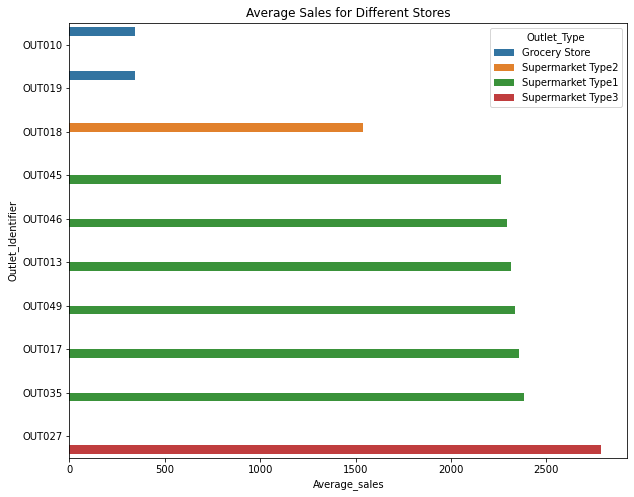

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(y=df1.Outlet_Identifier,x=df1.Average_sales,hue=df1["Outlet_Type"],orient="h",)
plt.title("Average Sales for Different Stores")
plt.show()

<h5>The only Type 3 Supermarket is having the highest average among all the other stores. 

In [19]:
print("\nLocation wise Number of Stores :")
print("---------------------------")
stor_tier=df1.Outlet_Location_Type.value_counts().to_dict()
print("Number of Tier 1 Stores in the city: ",list(stor_tier.values())[1])
print("Number of Tier 2 Stores in the city: ",list(stor_tier.values())[2])
print("Number of Tier 3 Stores in the city: ",list(stor_tier.values())[0])

print("\nSize wise Number of Stores :")
print("---------------------------")
stor_tier=df1.Outlet_Size.value_counts().to_dict()
print("Number of small stores in the city: ",list(stor_tier.values())[0])
print("Number of Medium Stores in the city: ",list(stor_tier.values())[1])
print("Number of High Stores in the city: ",list(stor_tier.values())[2])

print("\nStore type wise Number of Stores :")
print("---------------------------")
stor_Type=df1.Outlet_Type.value_counts().to_dict()
for key,value in stor_Type.items():
    print(f"Number of {key} in the city: {value}")


Location wise Number of Stores :
---------------------------
Number of Tier 1 Stores in the city:  3
Number of Tier 2 Stores in the city:  3
Number of Tier 3 Stores in the city:  4

Size wise Number of Stores :
---------------------------
Number of small stores in the city:  5
Number of Medium Stores in the city:  4
Number of High Stores in the city:  1

Store type wise Number of Stores :
---------------------------
Number of Supermarket Type1 in the city: 6
Number of Grocery Store in the city: 2
Number of Supermarket Type2 in the city: 1
Number of Supermarket Type3 in the city: 1


Average Sales of Tier 1 store : 1963.16 $
Average Sales of Tier 2 store : 2333.36 S
Average Sales of Tier 3 store : 1950.98 $

Average Sales of Grocery Store: 342.99$
Average Sales of Supermarket Type1: 2323.26$
Average Sales of Supermarket Type2: 1536.66$
Average Sales of Supermarket Type3: 2784.71$


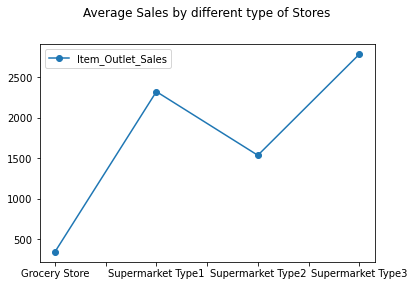

In [20]:
pt1= pd.pivot_table(df,index=["Outlet_Location_Type"],values="Item_Outlet_Sales",aggfunc="mean")
print("Average Sales of Tier 1 store :",round(pt1.iloc[0,0],2),"$")
print("Average Sales of Tier 2 store :",round(pt1.iloc[1,0],2),"S")
print("Average Sales of Tier 3 store :",round(pt1.iloc[2,0],2),"$")

print()


pt2= pd.pivot_table(df,index=["Outlet_Type"],values="Item_Outlet_Sales",aggfunc="mean").to_dict()
for key,value in pt2["Item_Outlet_Sales"].items():
    print(f"Average Sales of {key}: {round(value,2)}$")
    
    

pd.DataFrame(pt2).plot(marker="o")
plt.title("Average Sales by different type of Stores",y=1.1)
plt.show()

<p> Type 3  Supermarkets are the stores with maximum average sales.<p>
<p> Type 1 Supermarkets are also not far behind in terms of average Sales<p>

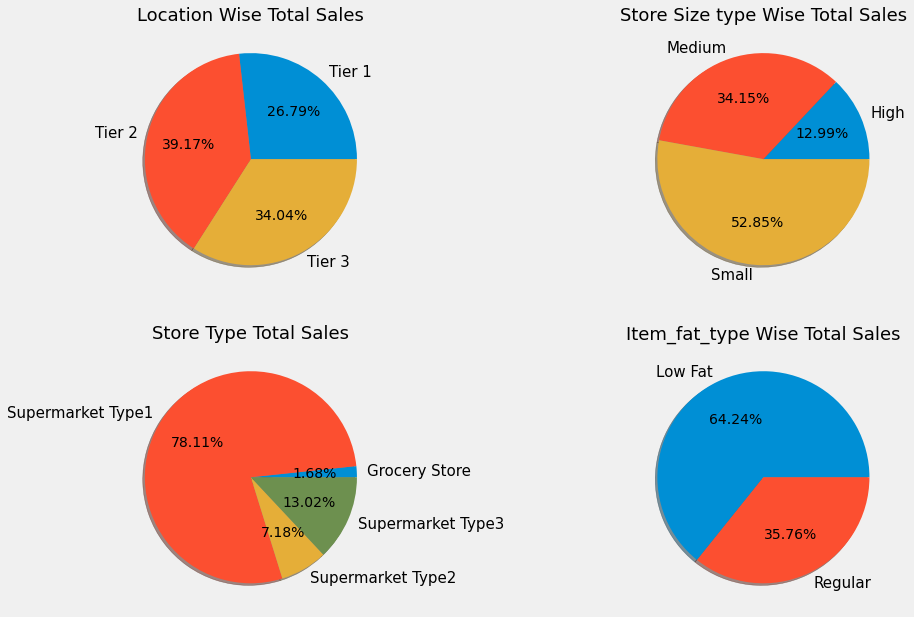

In [21]:
tierwise_piv=pd.pivot_table(df,index=["Outlet_Location_Type"],values="Item_Outlet_Sales",aggfunc="sum").astype("int32")
sizewise_piv=pd.pivot_table(df,index=["Outlet_Size"],values="Item_Outlet_Sales",aggfunc="sum").astype("int32")
typewise_piv=pd.pivot_table(df,index=["Outlet_Type"],values="Item_Outlet_Sales",aggfunc="sum").astype("int32")
Fatwise_piv=pd.pivot_table(df,index=["Item_Fat_Content"],values="Item_Outlet_Sales",aggfunc="sum").astype("int32")

plt.style.use("fivethirtyeight")
fig, [[ax1, ax2], [ax3, ax4]]  = plt.subplots(ncols=2,nrows=2,figsize=(15,10),)
patches, texts, autotexts =ax1.pie(tierwise_piv["Item_Outlet_Sales"].tolist(),labels=tierwise_piv.index.tolist(),autopct="%.2f%%",shadow=True)
ax1.set_title("Location Wise Total Sales",y=1,size=18)
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)
texts[2].set_fontsize(15)

patches, texts, autotexts =ax2.pie(sizewise_piv["Item_Outlet_Sales"].tolist(),labels=sizewise_piv.index.tolist(),autopct="%.2f%%",shadow=True,)
ax2.set_title("Store Size type Wise Total Sales",y=1,size=18)
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)
texts[2].set_fontsize(15)


patches, texts, autotexts =ax3.pie(typewise_piv["Item_Outlet_Sales"].tolist(),labels=typewise_piv.index.tolist(),autopct="%.2f%%",shadow=True)
ax3.set_title("Store Type Total Sales",y=1,size=18)
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)
texts[2].set_fontsize(15)
texts[3].set_fontsize(15)


patches, texts, autotexts =ax4.pie(Fatwise_piv["Item_Outlet_Sales"].tolist(),labels=Fatwise_piv.index.tolist(),autopct="%.2f%%",shadow=True)
ax4.set_title("Item_fat_type Wise Total Sales",y=1,size=18)
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)


plt.show()


<p> 1. We can observe in the top-left chart that total sales is almost same in all the locations.Stores in Tier 2  locations have slightly upperhand in terms of number Total Revenue.<p>

<p>2. In the top right pi chart we observe that almost 50% of the total sales is for Small stores. i.e small stores have better customer reach than the larger stores.<p>

<p>3. Bottom left plot showing a clear dominance of Type 1 Supermarket in total sales. Therefore, Number of small type 1 supermarkets shoud be increased. <p>

<p>4. In the Bottom Right pie chart we can see that almost 65% of total sales are from items with Low Fat.<p>

# Distribution of Overall Sales

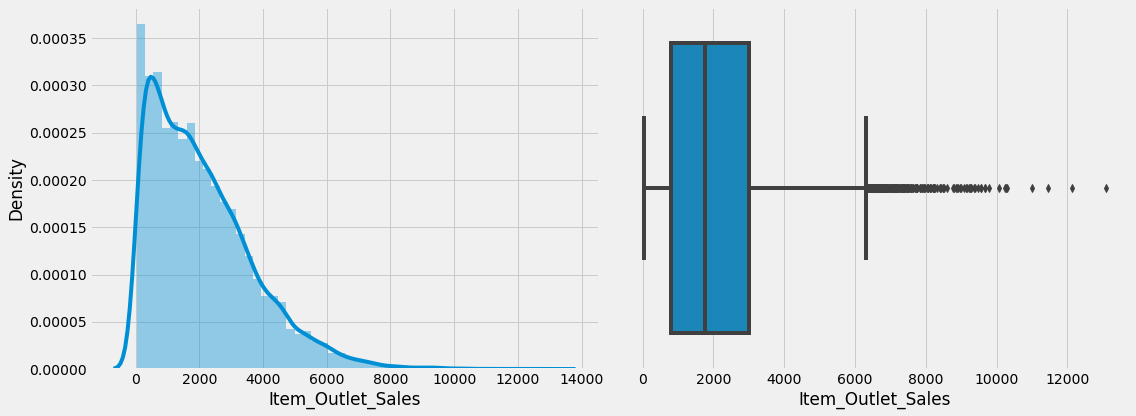

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(df.Item_Outlet_Sales)

plt.subplot(1,2,2)
sns.boxplot(df.Item_Outlet_Sales)

plt.tight_layout()
plt.show()


<p>For most of the product total sales amount is between 0-2000 USD.<br> 
Thus the given data for total sales have a Right-Tailed Distribution. 
From the boxplot we can confirm that the sales of product greater that 10000$ behaves like a outlier.<p>

In [23]:
df3_outlier = df[df.Item_Outlet_Sales>10000]
df3_outlier

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
1009,FDU14,17.75,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750,37
1450,FDZ20,16.10,Low Fat,0.074402,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020,37
4349,FDP33,18.70,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896,37
4888,FDF39,14.85,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490,35
5223,FDQ19,7.35,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600,37
6541,FDI50,8.42,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840,37
7188,NCE42,21.10,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648,37
7191,NCH18,9.30,Low Fat,0.044445,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.8882,37


As we can See that out these 10 products ,with total sales greater that 10000 USD , 9 products are from Type 3 Supermarket.\
As there is only one Supermarket type 3 in the city, we cannot consider these Product's sales as outlier. Rather we can say that these products are mostly purchased from Type 3 Super Markets.

# Products wise Total Sales Analysis

In [24]:
df2= df.drop_duplicates(subset= "Item_Identifier",keep="first")

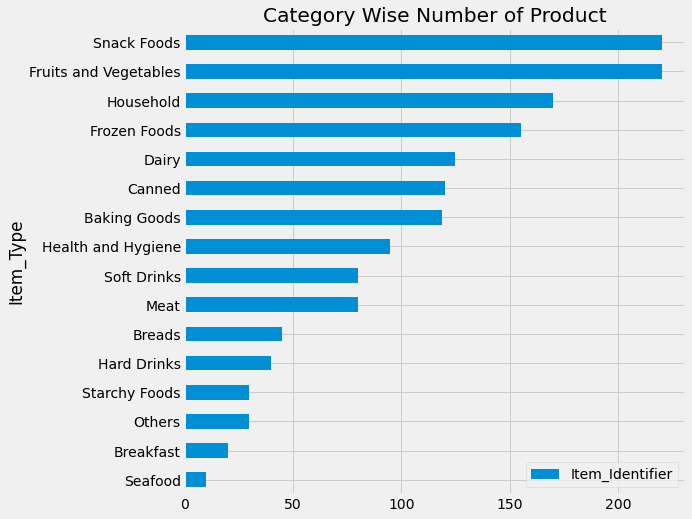

In [25]:
pd.pivot_table(data= df2,index="Item_Type",values="Item_Identifier",aggfunc="count").sort_values("Item_Identifier").plot(kind="barh",figsize=(8,8))
plt.title("Category Wise Number of Product")
plt.show()

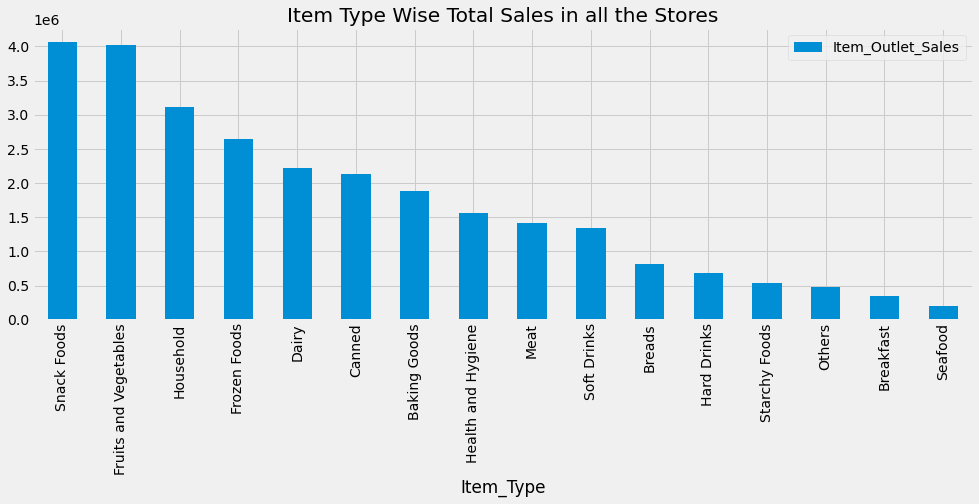

In [26]:
ax=pd.pivot_table(data= df,values="Item_Outlet_Sales",index= "Item_Type",aggfunc="sum").sort_values(by="Item_Outlet_Sales",ascending=False).plot(kind="bar",figsize=(15,5),)
ax.set_title("Item Type Wise Total Sales in all the Stores")
plt.show()  

<p>Snack Foods and Fruits & Vegetables are the highest contributors for the total Sales of all the Stores.<p>
<p>Household items along with the Frozen foods are also contributing significantly in the Total Revenue by all the Stores<p>

In [27]:
df_smt1= df[df["Outlet_Type"]=="Supermarket Type1"].sort_values("Item_Outlet_Sales",ascending=False).head()
df_smt2= df[df["Outlet_Type"]=="Supermarket Type2"].sort_values("Item_Outlet_Sales",ascending=False).head()
df_smt3= df[df["Outlet_Type"]=="Supermarket Type3"].sort_values("Item_Outlet_Sales",ascending=False).head()
df_gro= df[df["Outlet_Type"]=="Grocery Store"].sort_values("Item_Outlet_Sales",ascending=False).head()

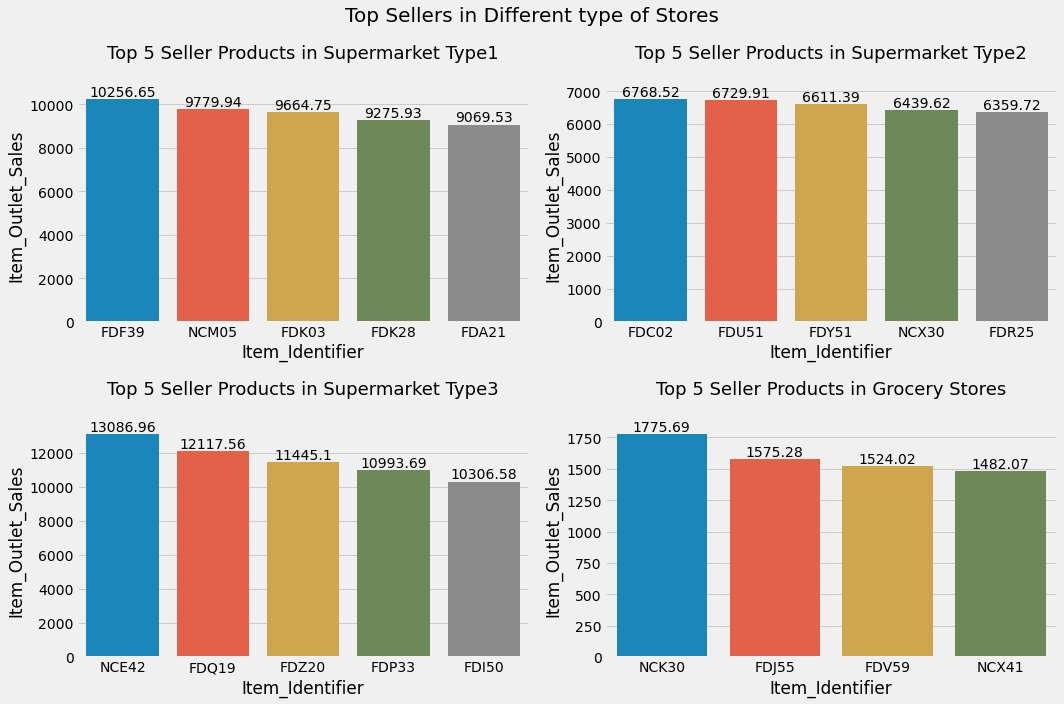

In [28]:
fig, [[ax1, ax2], [ax3, ax4]]  = plt.subplots(ncols=2,nrows=2,figsize=(15,10),)

sns.barplot(data=df_smt1, x=df_smt1["Item_Identifier"], y= df_smt1["Item_Outlet_Sales"],ax=ax1)
for i in ax1.patches:
    h= i.get_height()
    x= i. get_x()+i.get_width()/2
    ax1.annotate(round(h,2),(x,h), va = "bottom", ha ="center")
ax1.set_title("Top 5 Seller Products in Supermarket Type1",y=1.1,size=18)


    
sns.barplot(data=df_smt2, x=df_smt2["Item_Identifier"], y= df_smt2["Item_Outlet_Sales"],ax=ax2)
for i in ax2.patches:
    h= i.get_height()
    x= i. get_x()+i.get_width()/2
    ax2.annotate(round(h,2),(x,h), va = "bottom", ha ="center")
ax2.set_title("Top 5 Seller Products in Supermarket Type2",y=1.1,size=18)

    
sns.barplot(data=df_smt3, x=df_smt3["Item_Identifier"], y= df_smt3["Item_Outlet_Sales"],ax=ax3)
for i in ax3.patches:
    h= i.get_height()
    x= i. get_x()+i.get_width()/2
    ax3.annotate(round(h,2),(x,h), va = "bottom", ha ="center")
ax3.set_title("Top 5 Seller Products in Supermarket Type3",y=1.1,size=18)


    
sns.barplot(data=df_gro, x=df_gro["Item_Identifier"], y= df_gro["Item_Outlet_Sales"],ax=ax4)
for i in ax4.patches:
    h= i.get_height()
    x= i. get_x()+i.get_width()/2
    ax4.annotate(round(h,2),(x,h), va = "bottom", ha ="center")
ax4.set_title("Top 5 Seller Products in Grocery Stores",y=1.1,size=18)

plt.suptitle("Top Sellers in Different type of Stores",size=20)


plt.tight_layout()

<h5>Here are top 5 best Seller Products for each type of Stores.

<h5>Average Item Visibility for  different Size of stores 

In [29]:
pd_vis=pd.pivot_table(data=df,index="Outlet_Size",values="Item_Visibility",aggfunc="mean")
pd_vis

,Item_Visibility
Outlet_Size,
High,0.064222
Medium,0.069876
Small,0.069539


<h5>Average Visibility of product for all sizes of stores are almost Same. 

# Multivariate Analysis

[]

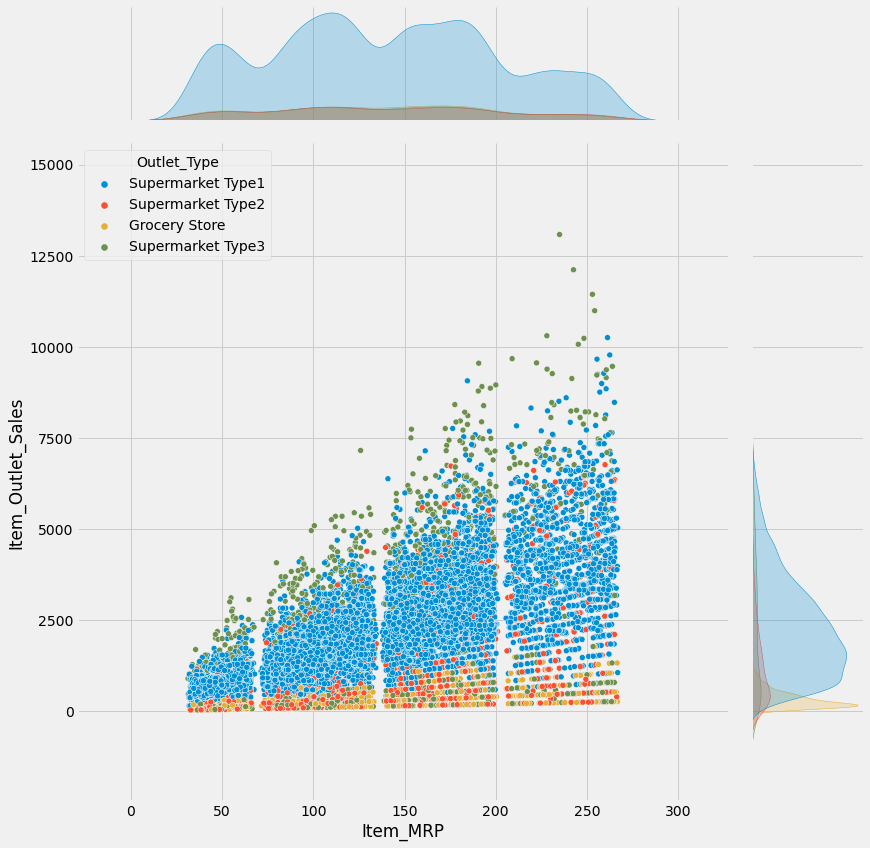

In [30]:
sns.jointplot(x="Item_MRP",y="Item_Outlet_Sales",data=df,hue="Outlet_Type",height=12,)
plt.plot()

<p><big> For all the range of MRP <b/>Most of the Items Sold</b> are from Type 1 Super Markets<p>
   
<p>But,In Type 3 Super-Marker <b/>Total Sales amount for Most of the Products</b> is clearly higher.<p>
    
<p>Among all the products those with <b/>higher sales</b> are from Type 3 Super Market<big> <p>
    

Text(0.5, 1.1, 'Correlation among the all the Numerical attributes ')

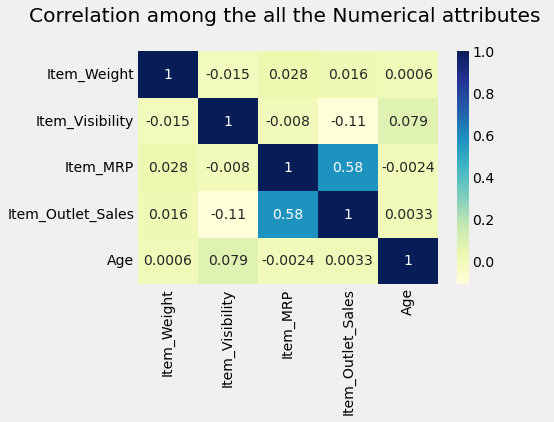

In [31]:
sns.heatmap(df.drop("Outlet_Establishment_Year",axis=1).corr(),cmap="YlGnBu",annot=True)
plt.title("Correlation among the all the Numerical attributes ",y=1.1)

<p><big>In the above heatmap we can observe that item MRP has a good amount of positive correlation with the total Revenue for all the Stores.<big><p3>

# <font color="green"/>Building Sales Prediction Model using Machine Learning </font>

<h2>Algorithms that we will consider:-</h2>

1. Simple Linear Regression
2. Polynomial Regression
3. Decision Tree Regression
4. Random Forest Regression
5. Adaboost Regressor

<p><b/><Big/><Big/>Preparing Data:</big></big><b>

As per the above analysis we are considering the following features for our Regression Model.

1. Item_Fat_Content
2. Item_MRP
3. Outlet_Size
4. Outlet_Location_Type
5. Outlet_Type

In [32]:
X0 = df.loc[:,['Item_Fat_Content','Item_MRP','Outlet_Size','Item_Type',
               'Outlet_Location_Type','Outlet_Type']] #X= Feature vector

y=df.loc[:,"Item_Outlet_Sales"]  #y= Target Vector

Item_Type= list(X0.Item_Type.unique())
Item_Fat_Content = list(X0.Item_Fat_Content.unique())
Outlet_Size= list(X0.Outlet_Size.unique())
Outlet_Location_Type= list(X0.Outlet_Location_Type.unique())
Outlet_Type= list(X0.Outlet_Type.unique())

In [33]:
#Train test Split of the Feature and Target Vector
X0_train,X0_test,y_train,y_test = train_test_split(X0,y,test_size=0.3,random_state=101)

In [34]:
#Encoding the Categorical Features
X_train = pd.get_dummies(X0_train, columns = ['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type'])
X_test= pd.get_dummies(X0_test, columns = ['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type'])

In [35]:
X_test["Outlet_Type_Grocery Store"].value_counts()

0    3542
1     406
Name: Outlet_Type_Grocery Store, dtype: int64

In [36]:
X_train["Outlet_Type_Grocery Store"].value_counts()

0    8269
1     943
Name: Outlet_Type_Grocery Store, dtype: int64

In [37]:
def model_metrics(model):
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    print("R-square score on train data= ",model.score(X_train,y_train))
    print("R-square score on test data= ",model.score(X_test,y_test))
    print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))
    print("Cross Validation Score: ",np.mean(cross_val_score(model,X_train,y_train,cv=5)))
    
    return model.score(X_train,y_train),model.score(X_test,y_test),mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),np.mean(cross_val_score(model,X_train,y_train))

<h5>Model 1: Linear Regression

In [38]:
# In oroder to normalize the range of independent variables or features of data we need to Scale them 
scaler= MinMaxScaler()

In [39]:
lin_reg = LinearRegression()
steps= [("scaler",scaler),("lin_reg",lin_reg)]
Linear_pipe=Pipeline(steps=steps)
r_train_lin,r_test_lin,MAE_lin,RMSE_lin,cv_score_lin=model_metrics(Linear_pipe)

R-square score on train data=  0.49046504565664095
R-square score on test data=  0.4915338826526363
Mean Absolute Error:  824.8844116084094
Root Mean Squared Error:  1143.9095413149844
Cross Validation Score:  0.49573910474464594


<h5>Model 2: Polynomial Regression

In [43]:
poly_model= PolynomialFeatures(degree=3)
lin_model=LinearRegression()
# stand_scaler= StandardSca
step= [("poly_features",poly_model),("lin_model",lin_model)]
poly_pipe=Pipeline(step)
r_train_pol,r_test_pol,MAE_pol,RMSE_pol,cv_score_pol=model_metrics(poly_pipe)

R-square score on train data=  0.5520981343231144
R-square score on test data=  0.5124741863467722
Mean Absolute Error:  768.1819363589593
Root Mean Squared Error:  1120.1069224858306
Cross Validation Score:  0.4349843742852217


<h5>Model 3: Decision Tree Regression

In [40]:
tree = DecisionTreeRegressor(max_depth=6)
steps= [("scaler",scaler),("tree",tree)]
tree_pipe=Pipeline(steps=steps)
r_train_tree,r_test_tree,MAE_tree,RMSE_tree,cv_score_tree=model_metrics(tree_pipe)

R-square score on train data=  0.5358374454532264
R-square score on test data=  0.5259744433683466
Mean Absolute Error:  756.6493294483856
Root Mean Squared Error:  1104.4893989613065
Cross Validation Score:  0.514185912838353


<h5>Model 4: Random Forest Regression

In [41]:
param_grid = {'max_depth': [2,3, 4, 5,6]
             }
grid_rdf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_rdf.fit(X_train, y_train)
grid_rdf.best_estimator_

RandomForestRegressor(max_depth=6)

From the Cross validation result we get that for hyperparameters max_depth =6 will give us a better model

In [42]:
rand_for = RandomForestRegressor(n_estimators=100,max_depth=6)
steps= [("scaler",scaler),("rand_for",rand_for)]
rdf_pipe=Pipeline(steps=steps)
r_train_rdf,r_test_rdf,MAE_rdf,RMSE_rdf,cv_score_rdf=model_metrics(rdf_pipe)

R-square score on train data=  0.5451585423796084
R-square score on test data=  0.5327407503963579
Mean Absolute Error:  751.8002768869777
Root Mean Squared Error:  1096.578248272031
Cross Validation Score:  0.5248517384467364


<h5>Model 5: AdaBoost Regression

In [44]:
rand_for = RandomForestRegressor(n_estimators=100,max_depth=6)
adareg= AdaBoostRegressor(rand_for,learning_rate=0.8)
steps= [("scaler",scaler),("adareg",adareg)]
ada_pipe=Pipeline(steps=steps)
r_train_ada,r_test_ada,MAE_ada,RMSE_ada,cv_score_ada=model_metrics(ada_pipe)

R-square score on train data=  0.5533797807054034
R-square score on test data=  0.5202784696686669
Mean Absolute Error:  767.9563862524027
Root Mean Squared Error:  1111.1054519507882
Cross Validation Score:  0.5173773408025757


<h5>Comparison of all the 5 Models

In [47]:
# Comparing Different Models:

model_name= ["Simple Linear Regression",
"Polynomial Regression",
"Decision Tree Regression",
"Random Forest Regression",
"Adaboost Regression"]

R_Square_train=[r_train_lin,r_train_pol,r_train_tree,r_train_rdf,r_train_ada]
R_Square_rdf=[r_test_lin,r_test_pol,r_test_tree,r_test_rdf,r_test_ada]
MAE=[MAE_lin,MAE_pol,MAE_tree,MAE_rdf,MAE_ada]
RMSE=[RMSE_lin,RMSE_pol,RMSE_tree,RMSE_rdf,RMSE_ada]
CV_Score=[cv_score_lin,cv_score_pol,cv_score_tree,cv_score_rdf,cv_score_ada]


Error_name = {"R_Square_train":R_Square_train,
              "R_Square_rdf":R_Square_rdf,
              "MAE":MAE,
              "RMSE":RMSE,
              "CV_Score":CV_Score}

pd.DataFrame(Error_name, index=model_name)

,R_Square_train,R_Square_rdf,MAE,RMSE,CV_Score
Simple Linear Regression,0.490465,0.491534,824.884412,1143.909541,0.495739
Polynomial Regression,0.552098,0.512474,768.181936,1120.106922,0.434984
Decision Tree Regression,0.535837,0.525974,756.649329,1104.489399,0.514483
Random Forest Regression,0.545159,0.532741,751.800277,1096.578248,0.525805
Adaboost Regression,0.553380,0.520278,767.956386,1111.105452,0.519965


<h5/> In the above Comparision sheet we can see that : </h5>
<p/> For both Linear Regression R-square score and cross Validation score is comparatively less than others </p>
<p/> R-square score is maximum in training set for Polynomial Regression but its cross Validation score is less. </p>
<p/> Decision Tree Regression,Adaboost Regressor and Random Forest Regression all are having good R-square Score in both Training set and Test. Also their Cross Validation score is quite good.</p>
<p/> Root Measn Square Error and Mean Absolute Error are least for Random Forest Regression</p>

<p/> <font color="blue">Therefore, We are considering <u/><l/><b/>Random Forest Regression</b><l></u> as our Final Model</p>


<h2><font color="green">Final Model:

In [48]:
X0_test["Sales"]=y_test
rfor = RandomForestRegressor(n_estimators=100,max_depth=6)
rfor.fit(X_train,y_train)
X0_test["Predicted Sales"]= rfor.predict(X_test)

In [49]:
# Predicted Sales for Test Set
X0_test

,Item_Fat_Content,Item_MRP,Outlet_Size,Item_Type,Outlet_Location_Type,Outlet_Type,Sales,Predicted Sales
2903,Low Fat,72.9696,Small,Frozen Foods,Tier 2,Supermarket Type1,596.556800,1122.640271
3256,Low Fat,115.5150,Medium,Meat,Tier 3,Supermarket Type3,1631.210000,2148.302946
12970,Regular,168.3500,Small,Baking Goods,Tier 2,Supermarket Type1,4577.375000,2882.884686
8405,Low Fat,123.1046,Small,Fruits and Vegetables,Tier 1,Grocery Store,124.504600,263.624468
7504,Low Fat,105.6938,Small,Others,Tier 1,Grocery Store,214.387600,242.140474
...,...,...,...,...,...,...,...,...
10482,Low Fat,101.2042,Small,Frozen Foods,Tier 2,Supermarket Type1,1388.858800,1638.400038
3227,Low Fat,248.3460,Medium,Household,Tier 3,Grocery Store,985.384000,535.055509
7746,Low Fat,110.6544,High,Snack Foods,Tier 3,Supermarket Type1,1901.524800,1907.354110
11288,Regular,125.1388,Small,Meat,Tier 1,Grocery Store,495.355200,292.367587


# <font color="green">Sales Prediction using ML model

In [50]:
def Reseting_subarray():
    Item_Type.sort()
    Item_Fat_Content.sort()
    Outlet_Size.sort()
    Outlet_Location_Type.sort()
    Outlet_Type.sort()
    items= Item_Fat_Content + Outlet_Size + Outlet_Location_Type + Outlet_Type + Item_Type
    inputvector= {"MRP":0}
    for i in items:
        inputvector[i]=0
    return inputvector
    

In [51]:
# Required Widgets

text_mrp=widgets.BoundedFloatText(
    value=100,
    min=0,
    max=100000.0,
    step=0.1,
    description='MRP',
    disabled=False
)
fat_wid= widgets.RadioButtons(
    options=['Low Fat','Regular'],
#     layout={'width': 'max-content'},
    description='Fat Contains',
    disabled=False)

size_wid= widgets.RadioButtons(
    options=['High', 'Medium', 'Small'],
#     layout={'width': 'max-content'},
    description='Store Size',
    disabled=False)


loc_wid= widgets.RadioButtons(
    options=['Tier 1', 'Tier 2', 'Tier 3'],
#     layout={'width': 'max-content'},
    description='Store Type',
    disabled=False)


type_wid= widgets.RadioButtons(
    options=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2','Supermarket Type3'],
#     layout={'width': 'max-content'},
    description='Store location',
    disabled=False)

Item_Type.sort()

itemtype_wid= widgets.Dropdown(
    options= Item_Type,
    description='Item Type:',
    disabled=False,
)




In [52]:
def Sales_predictor(Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type):
    
    inputvector=Reseting_subarray()
    
    inputvector["MRP"]= Item_MRP
    inputvector[Item_Fat_Content]=1
    inputvector[Outlet_Size]=1
    inputvector[Outlet_Type]=1
    inputvector[Outlet_Location_Type]=1
    inputvector[Item_Type]=1
    
    input_list= list(inputvector.values())
    
    steps= [("scaler",scaler),("rfor",rfor)]
    rfor_pipe=Pipeline(steps=steps)
    rfor_pipe.fit(X_train,y_train)
    predicted_Sales = rfor_pipe.predict([input_list])
    
    df_new = df[(df["Item_Fat_Content"]==Item_Fat_Content) & (df["Outlet_Size"]==Outlet_Size)&
                (df["Outlet_Location_Type"]==Outlet_Location_Type) &(df["Outlet_Type"]==Item_Fat_Content) &
                (df["Item_Type"]==Item_Type)]
    
    
    print()
    
    for i in tqdm(range(2000000)):
        pass

    
    if predicted_Sales[0] >0:
        print("The Predicted Sales is: ",predicted_Sales[0],"$")
    else:
        print("The Predicted Sales is: ",0,"$")
    

<h3>User Input For Predicting Sales

In [53]:
interact(Sales_predictor, Item_MRP=text_mrp,Item_Fat_Content=fat_wid,
         Outlet_Size=size_wid,Outlet_Location_Type=loc_wid,Outlet_Type=type_wid,Item_Type=itemtype_wid);

interactive(children=(BoundedFloatText(value=100.0, description='MRP', max=100000.0, step=0.1), RadioButtons(d…

<h3/><font color="green">Conclusion:<font></h3> 

<p/>1. There is only one Type 3 Type Supermarket ID:OUT027,which is the oldest stores among all. But the average sales by this store is highest. Therefore, number of type 3 stores should be increased. </p>
<p/>2. Buyers are prefering smaller stores rather than medium and larger size of stores. Therefore number of smaller stores should be increased. </p>
<p/>3. Breakfast and seafoods are least sold item types. Therefore visibility of these items need to be increased in order to get a better revenue from these type of foods.</p>